## This notebook is to annotate new dataset

In [2]:
from F00_global_variables import *
os.chdir('/mnt/08_thymus_cell_atlas/')

sys.path.append('/mnt/thymus_atlas')
import scjp
from scjp import markers, model, draw

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, color_map='OrRd')
sc.logging.print_version_and_date()
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

version = 'HTA08.v01.A01.'

print('Version: '+version)

Running Scanpy 1.4.3 on 2019-09-22 10:04.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Version: HTA08.v01.A01.


## [save] saved ndata

## Load previous annotation file

In [3]:
fig1 = sc.read('/mnt/02_FCA_ImmunoP/04_Reviewers/A42.v01.fig1.h5ad',backed='r')
previous = sc.read('HTA07.A01.v02.fig1_data',backed='r')

Only considering the two last: ['.fig1', '.h5ad'].
Only considering the two last: ['.fig1', '.h5ad'].
Only considering the two last: ['.v02', '.fig1_data'].


## Get sample list

In [4]:
# define sample list
smp_list = [x.strip().split("\t") for x in smp_list_10X]

In [6]:
# check whether all files have been downloaded in matrix folder
exist = [x.split('/')[-1] for x in glob.glob(DATAFOLDER+'*/*')]
if len([x for x in smp_list if x[0] not in exist])>0:
    print([x for x in smp_list if x[0] not in exist],'not in matrix folder')

In [7]:
# get samples which have data in matrix folder
smp_list = [x for x in smp_list if x[0] in exist]

In [8]:
ad = {}

In [10]:
raw_file_path =  './01_Matrix'

for filename, sample in smp_list:  
    if 'TH' not in sample:
        continue
    if sample in ad:
        continue
    try:
        path = '%s/%s/raw/'%(raw_file_path,filename)
        adata = sc.read(path+'matrix.mtx',cache=True).transpose()
    except:
        try:
            path = '%s/%s/'%(raw_file_path,filename)
            adata = sc.read(path+'matrix.mtx',cache=True).transpose()
        except:
            path = '%s/%s/filtered_gene_bc_matrices/GRCh38/'%(raw_file_path,filename)
            adata = sc.read(path+'matrix.mtx',cache=True).transpose()      
    try: 
        adata.var_names = np.genfromtxt(path + 'genes.tsv',dtype=str)[:,1]
        adata.var['GeneName'] = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
        adata.var['GeneID'] = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 0]
    except: 
        adata.var_names = np.genfromtxt(path + 'features.tsv',dtype=str)[:,1]
        adata.var['GeneName'] = np.genfromtxt(path + 'features.tsv', dtype=str)[:, 1]
        adata.var['GeneID'] = np.genfromtxt(path + 'features.tsv', dtype=str)[:, 0]
    adata.obs_names = np.genfromtxt(path + 'barcodes.tsv',dtype=str)
    adata.obs_names = [filename+"-"+x.strip("-1") for x in adata.obs_names]
    adata.obs['Sample'] = sample
    
    # caculate n_counts / n_genes per cell
    adata.obs['n_counts'] = np.sum(adata.X, axis=1).A1
    adata.obs['n_genes'] = np.sum(adata.X>0,axis=1)
    
    # filter cells
    clist = []
    clist.append(np.array(adata.obs['n_counts'] > 2000))
    if 'C34' in sample:
        clist.append(np.array(adata.obs['n_counts'] > 3000))
    clist.append(np.array(adata.obs['n_genes'] > 500))
    clist.append(np.array(adata.obs['n_genes'] < 7000))
    
    c = np.column_stack(clist).all(axis=1)
    adata = adata[c].copy()
    
    adata = adata[:,np.argsort(adata.var.GeneID)]
    
    adata.obs['donor'] = [convert_obs_name(x)[0] for x in adata.obs['Sample']]
    adata.obs['organ'] = [convert_obs_name(x)[1] for x in adata.obs['Sample']]
    adata.obs['sort'] = [convert_obs_name(x)[2] for x in adata.obs['Sample']]
    adata.obs['method'] = ['5GEX' if '5GEX' in x else '3GEX' for x in adata.obs['Sample']]
    adata.obs['file'] = filename
    
    mito_genes = adata.var_names.str.startswith('MT-')
    adata.obs['mito'] = (np.sum(adata.X[:, mito_genes],axis=1).A1) / (np.sum(adata.X,axis=1).A1)

    scrub = scr.Scrublet(adata.X)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(verbose=False)
    adata.obs['doublet_scores'] = doublet_scores
    adata.obs['predicted_doublets'] = predicted_doublets
    
    ad[sample] = adata
   # sc.write('%s%s_filtered'%(version,filename),adata)

... reading from cache file cache/01_Matrix-FCAImmP7179369-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7179370-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7198432-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7198634-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7198635-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7277556-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7277557-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7292030-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7277564-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7277565-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7292034-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7528283-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7528284-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7528285-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7528294-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7555851-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7555852-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7555860-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7555861-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7579218-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7579219-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning:

invalid value encountered in log



... reading from cache file cache/01_Matrix-FCAImmP7579230-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7579231-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462257-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462258-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462259-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462260-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462261-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462262-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462263-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7462264-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528585-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528586-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528587-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528588-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528589-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528590-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528591-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-4861STDY7528592-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA7-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA8-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA9-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA10-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA11-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA12-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA13-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-TTA14-filtered_gene_bc_matrices-GRCh38-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851890-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851891-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851892-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851893-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851894-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851895-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851896-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-FCAImmP7851897-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-5478STDY7935100-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T03_TH_TOT_5GEX_1_S1-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T03_TH_TOT_5GEX_2_S2-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T06_TH_TOT_5GEX_1_S9-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T06_TH_TOT_5GEX_2_S10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T06_TH_TOT_5GEX_3_S11-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T06_TH_TOT_5GEX_4_S12-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T07_TH_TOT_1_S1-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T07_TH_TOT_2_S2-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-T07_TH_EPCAM_S3-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-F83_TH_EPCAM-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-A45_TH_EPCAM-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-A45_TH_45N-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8084742-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8084743-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8084744-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8084745-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8062669-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8062670-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8062674-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-WSSS8062675-raw-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-Human_colon_16S7985396-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-Human_colon_16S7985397-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-A45-THY-TOT-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-A45-THY-CD137P-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/01_Matrix-A45-THY-CD137N-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... writing an h5ad cache file to speedup reading next time


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Merge dataset

In [11]:
merged = scjp.merge_matrix(ad)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


273458
Sample
n_counts
n_genes
donor
organ
sort
method
file
mito
doublet_scores
predicted_doublets
name


In [12]:
scjp.write(merged,version,'entire_data_raw_count')

... storing 'Sample' as categorical


Only considering the two last: ['.A01', '.entire_data_raw_count'].


... storing 'donor' as categorical
... storing 'organ' as categorical
... storing 'sort' as categorical
... storing 'method' as categorical
... storing 'file' as categorical
... storing 'name' as categorical
... storing 'GeneName' as categorical


HTA08_v01_A01_entire_data_raw_count = 'HTA08.v01.A01.entire_data_raw_count'


## Preprocessing

In [13]:
sc.pp.normalize_per_cell(merged,counts_per_cell_after=10e4)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [14]:
sc.pp.log1p(merged)

In [15]:
merged.raw = merged

## update_meta (1)

In [16]:
def donor_source(adata):
    source = []
    for x in adata.obs['donor']:
        if x.startswith('F'):
            source.append('Newcastle')
        elif x.startswith("T0"):
            source.append('Newcastle')
        elif x.startswith('P'):
            source.append('Ghent')
        else:
            source.append('Sanger')
    return source

In [17]:
def donor_stage(adata):
    source = []
    for x in adata.obs['donor']:
        if x.startswith('F'):
            source.append('prenatal')
        elif x.startswith('C'):
            source.append('prenatal')
        elif x.startswith('P'):
            source.append('postnatal')
        else:
            source.append('postnatal')
    return source

In [18]:
merged.obs['source'] = donor_source(merged)
merged.obs['birth'] = donor_stage(merged) # let's change this to birth

In [19]:
merged.obs['batch'] = [x+y+z for x,y,z in zip(merged.obs['source'],merged.obs['birth'],merged.obs['method'])]
merged.obs['bbk'] = [x+y for x,y in zip(merged.obs['source'],merged.obs['method'])]

## Update meta (2)

In [21]:
meta = pd.read_csv('/mnt/thymus_atlas/Donor_meta.tsv',sep='\t')

In [26]:
meta.head()

,Donor,Stage,Order,Age,Epithelial (Liberase +/- enrich),Source,Gender
0,F35,F1,1,7w.2,NaN,HDBR,Female
1,F32,F1,2,7w,NaN,HDBR,Female
2,C40,F1,3,7w,O,Cambridge,Female
3,C41,F1,4,8w,O,Cambridge,Male
4,F34,F1,5,8w,NaN,HDBR,Female


In [29]:
meta_to_update = ['Donor','Order','Age','Gender','Source','Stage']

In [30]:
check_list = merged.obs.columns.copy()
for cat in check_list:
    if cat in meta_to_update:
        del merged.obs[cat]
    else:
        pass

In [31]:
merged_obs = pd.merge(merged.obs,meta[meta_to_update],left_on='donor',right_on='Donor',how='left')

In [33]:
merged_obs.index = merged.obs_names

In [34]:
merged.obs = merged_obs

In [35]:
def cvt_stage(x):
    if x in ['P2','A1']:
        return 'late'
    elif x in ['F1','F2']:
        return 'early'
    else:
        return 'middle'

merged.obs['Stage2'] = [cvt_stage(x) for x in merged.obs['Stage']]

## predict cycling

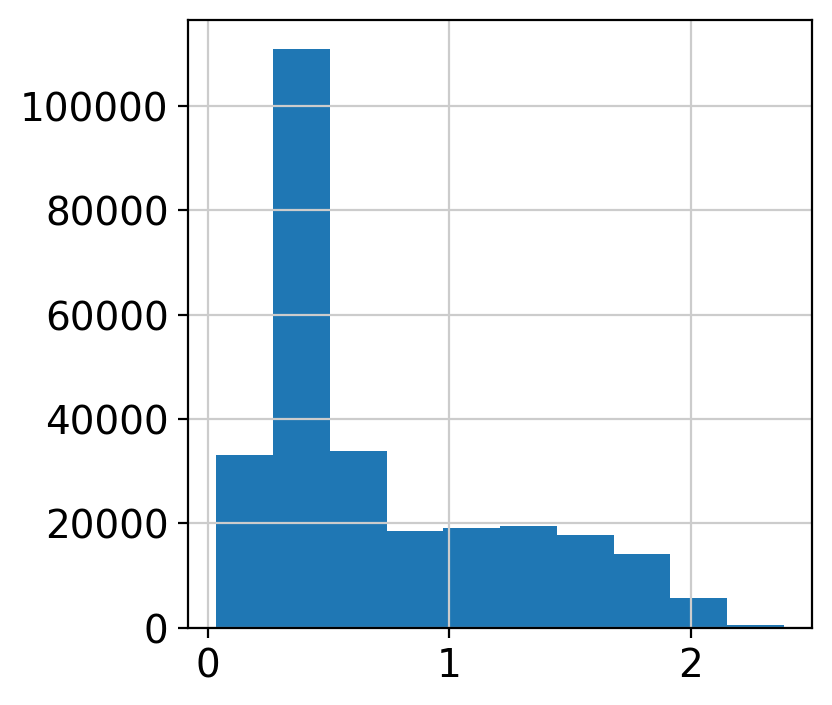

In [36]:
scjp.is_cycling(merged,cut_off=1)

## Merge predicted doublets with scrublet doublets

In [37]:
ndata = merged

In [38]:
scrublet_score_cutoff = 0.7

c1 = ndata.obs['doublet_scores'] > scrublet_score_cutoff
c2 = np.array(ndata.obs['predicted_doublets'])

ndata.obs['scrublet_doublets'] = c1 | c2

## Define true doublets using fig1

In [39]:
ndata.obs['is_Fig1'] = ndata.obs_names.isin(fig1.obs_names)

In [40]:
fig1_files = set(ndata.obs['file'][ndata.obs['is_Fig1']])

In [41]:
ndata.obs['is_file_Fig1'] = ndata.obs['file'].isin(fig1_files)

In [42]:
ndata.obs['true_doublets'] = ndata.obs['is_file_Fig1'] & (~ndata.obs['is_Fig1'])

In [43]:
ndata.obs['missed_doublets_scbl'] = ndata.obs['true_doublets'] & (~ndata.obs['scrublet_doublets'])

In [44]:
ndata.obs['missed_doublets_jp'] = (ndata.obs['scrublet_doublets'] & ndata.obs['is_file_Fig1']) & (~ndata.obs['true_doublets'])

## jp_doublet_define

In [45]:
mk_report = pkl.load(open('HTA05.v01.dbl_markers','rb'))

4


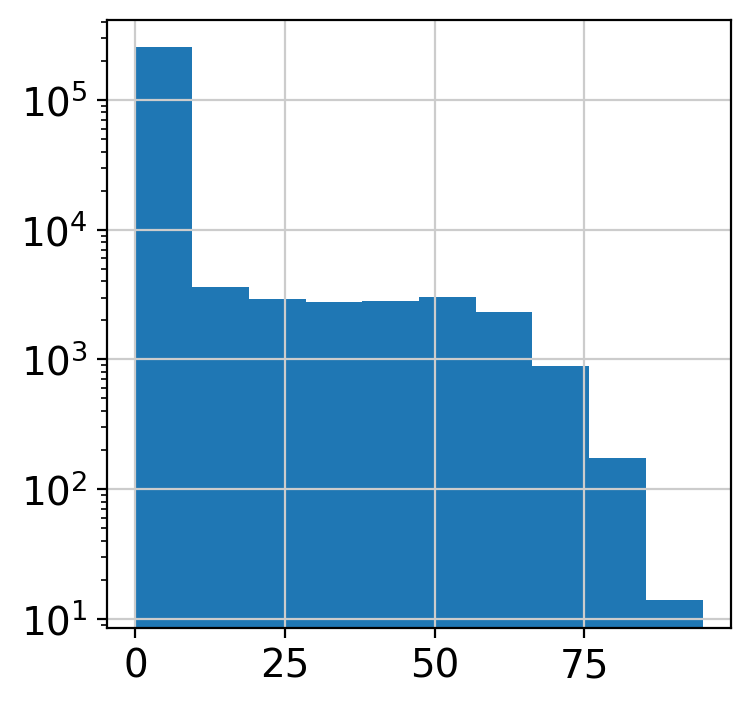

5


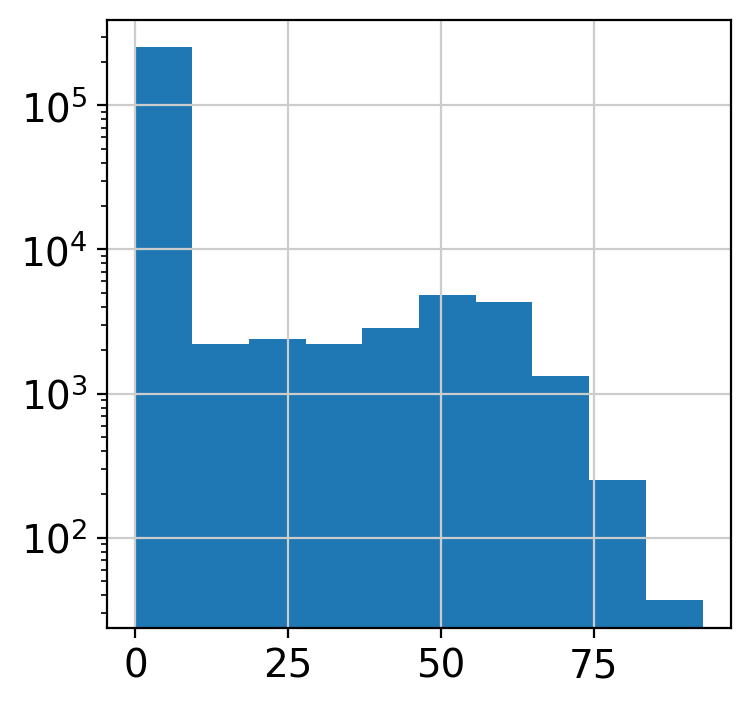

6


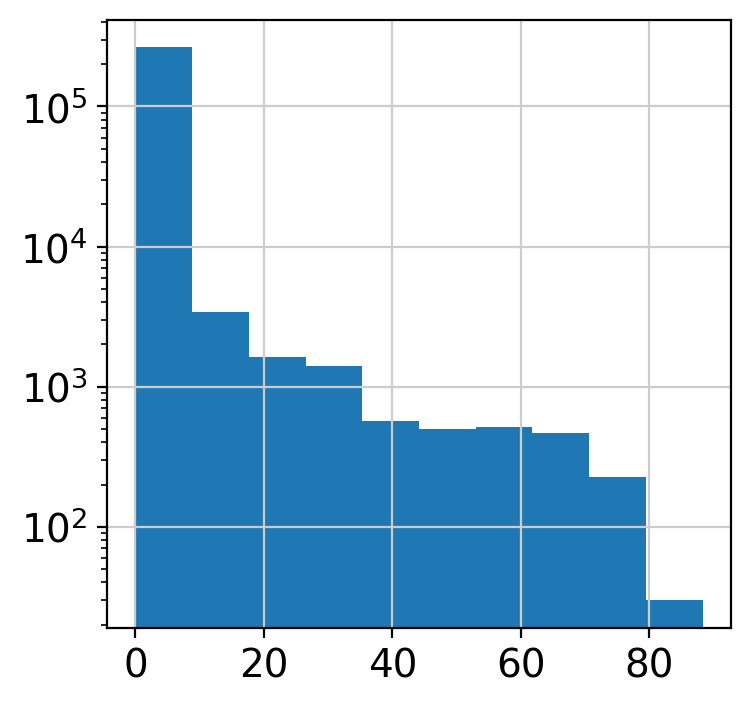

7


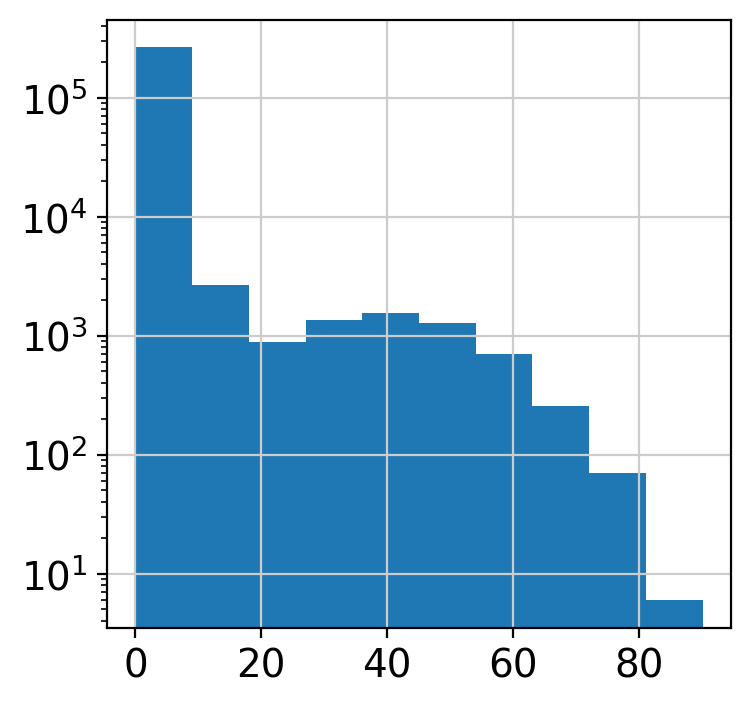

8


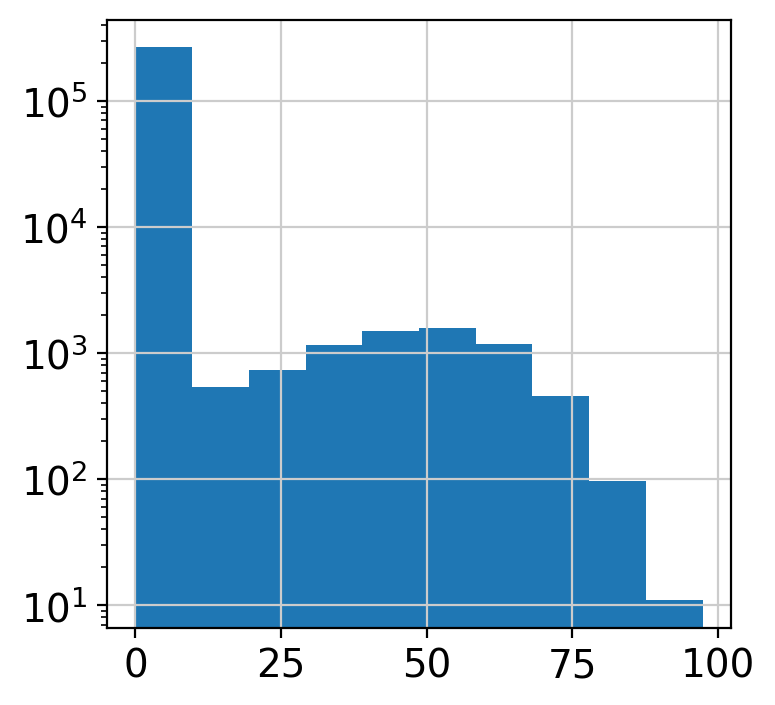

T


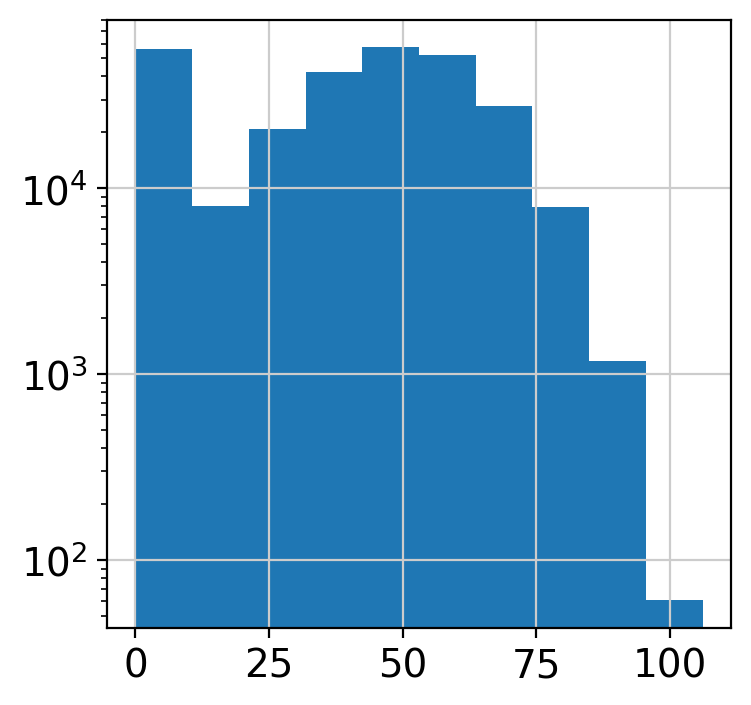

In [46]:
for x in mk_report:
    ndata.obs['anno_doublet_'+x+'_scores'] = np.sum(ndata.raw.X[:,ndata.raw.var_names.isin(mk_report[x])],axis=1).A1
    print(x)
   # sc.pl.umap(ndata,color='anno_doublet_'+x+'_scores',cmap='gist_rainbow')
   # plt.show()
    plt.hist(ndata.obs['anno_doublet_'+x+'_scores'],log=True)
    plt.show()

In [47]:
dbl_score_cut = 25
dbl_names = []
for x in mk_report:
    if x=='T':
        continue
    else:
        c1 = ndata.obs['anno_doublet_'+x+'_scores'] > dbl_score_cut
        c2 = ndata.obs['anno_doublet_T_scores'] > dbl_score_cut
        dbl_names.extend(ndata.obs_names[c1 & c2])


In [48]:
dbl_score_cut = 20

for x in mk_report:
    if x=='T':
        continue
    else:
        for y in mk_report:
            if y =='T':
                continue
            elif y ==x:
                continue
            else:
                c1 = ndata.obs['anno_doublet_'+x+'_scores'] > dbl_score_cut
                c2 = ndata.obs['anno_doublet_'+y+'_scores'] > dbl_score_cut
                dbl_names.extend(ndata.obs_names[c1 & c2])

In [49]:
ndata.obs['dbl_jp_method'] = ndata.obs_names.isin(dbl_names)

## Define broad doublet candidates

In [50]:
c1 = ndata.obs['dbl_jp_method'] # jp_defined T doublets
c2 = ndata.obs['true_doublets'] # fig1 defined doublets
c3 = ndata.obs['scrublet_doublets'] # scrublet defined doublets (score 0.7 or predicted)

ndata.obs['broad_doublets'] = c1|c2|c3

# Annotations

## Add previous annotation

In [51]:
lr_noF32 = jl.load('HTA06.A02.v03.lr_noF32.joblib')

In [52]:
merged.obs['anno_pred'] = lr_noF32.predict(merged.raw.X)

## Update B cell data

In [53]:
merged.obs['anno_fig1_detailed'] = 'unknown'

In [54]:
model.update_label(fig1,'anno_final',merged,
                   'anno_fig1_detailed','anno_fig1_detailed',replace=True,keep_replaced=False)

In [55]:
Bdata = merged[merged.obs['anno_pred']=='B_mature'].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


creating lr model...


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



making lr prediction...
updating lr to adata...


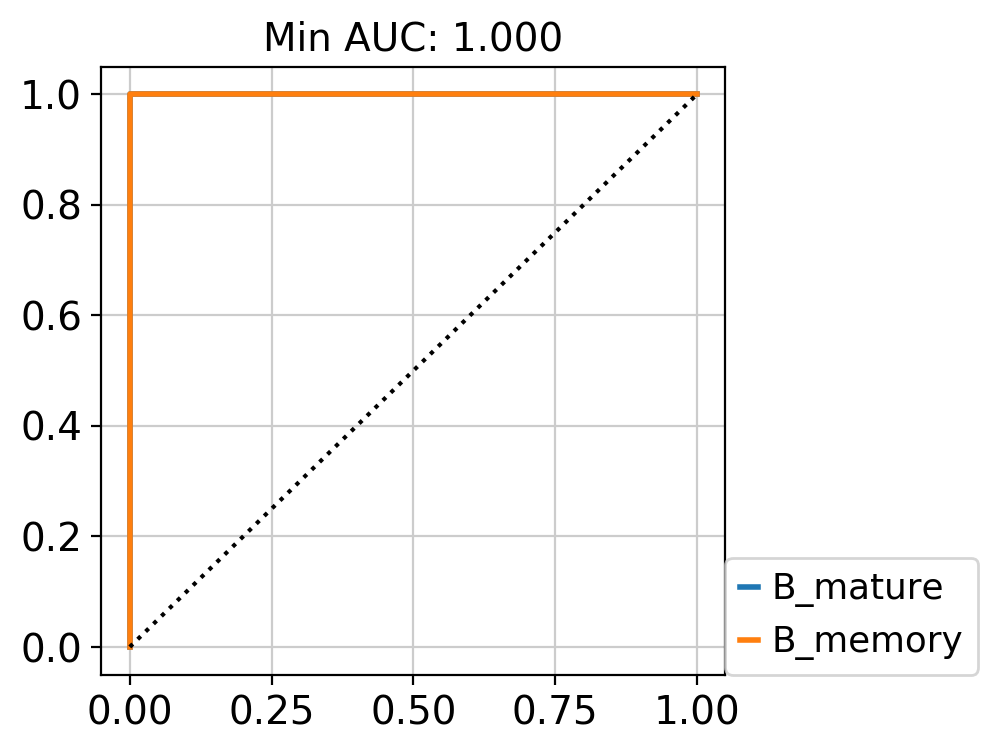

In [56]:
lr = model.transfer_annotation_jp(Bdata,'anno_fig1_detailed',Bdata,'anno_predict_B',
                                  exclude=[x for x in set(Bdata.obs['anno_fig1_detailed']) if x not in ['B_mature','B_memory'] ])

In [57]:
model.update_label(Bdata,'anno_predict_B',merged,
                   'anno_pred','anno_predict_B',replace=True,keep_replaced=False)

In [58]:
k = np.array(merged.obs['anno_predict_B'],dtype=object)
k[k=='B_mature'] = 'B_naive'
merged.obs['anno_predict_B'] = k

## fix fig1 annotations

In [65]:
model.update_label(fig1,'anno_final_print',merged,'anno_predict_B','anno_predict_fig1',replace=True,keep_replaced=False,exclude=['B_mature'])

## Modify B annotation

In [67]:
scjp.sc_process(Bdata,pid='fp')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:00.25)


In [68]:
Bdata.obs['Stage2_method'] = [x+y for x,y in zip(Bdata.obs['Stage2'],Bdata.obs['method'])]

In [69]:
scjp.bbknn_umap(Bdata,'Stage2_method',15)

computing batch balanced neighbors


/home/ubuntu/.local/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../home/ubuntu/.local/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^


/home/ubuntu/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning:

Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../home/ubuntu/.local/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^


/home/ubuntu/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning:


Fall-back from the nopython compilation path

	finished (0:00:02.53) --> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 50
    finished (0:00:12.39) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [70]:
sc.tl.leiden(Bdata,resolution=1)

running Leiden clustering
    finished (0:00:01.28) --> found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)


In [71]:
ann = scjp.annotater(Bdata,'anno_final_v1')

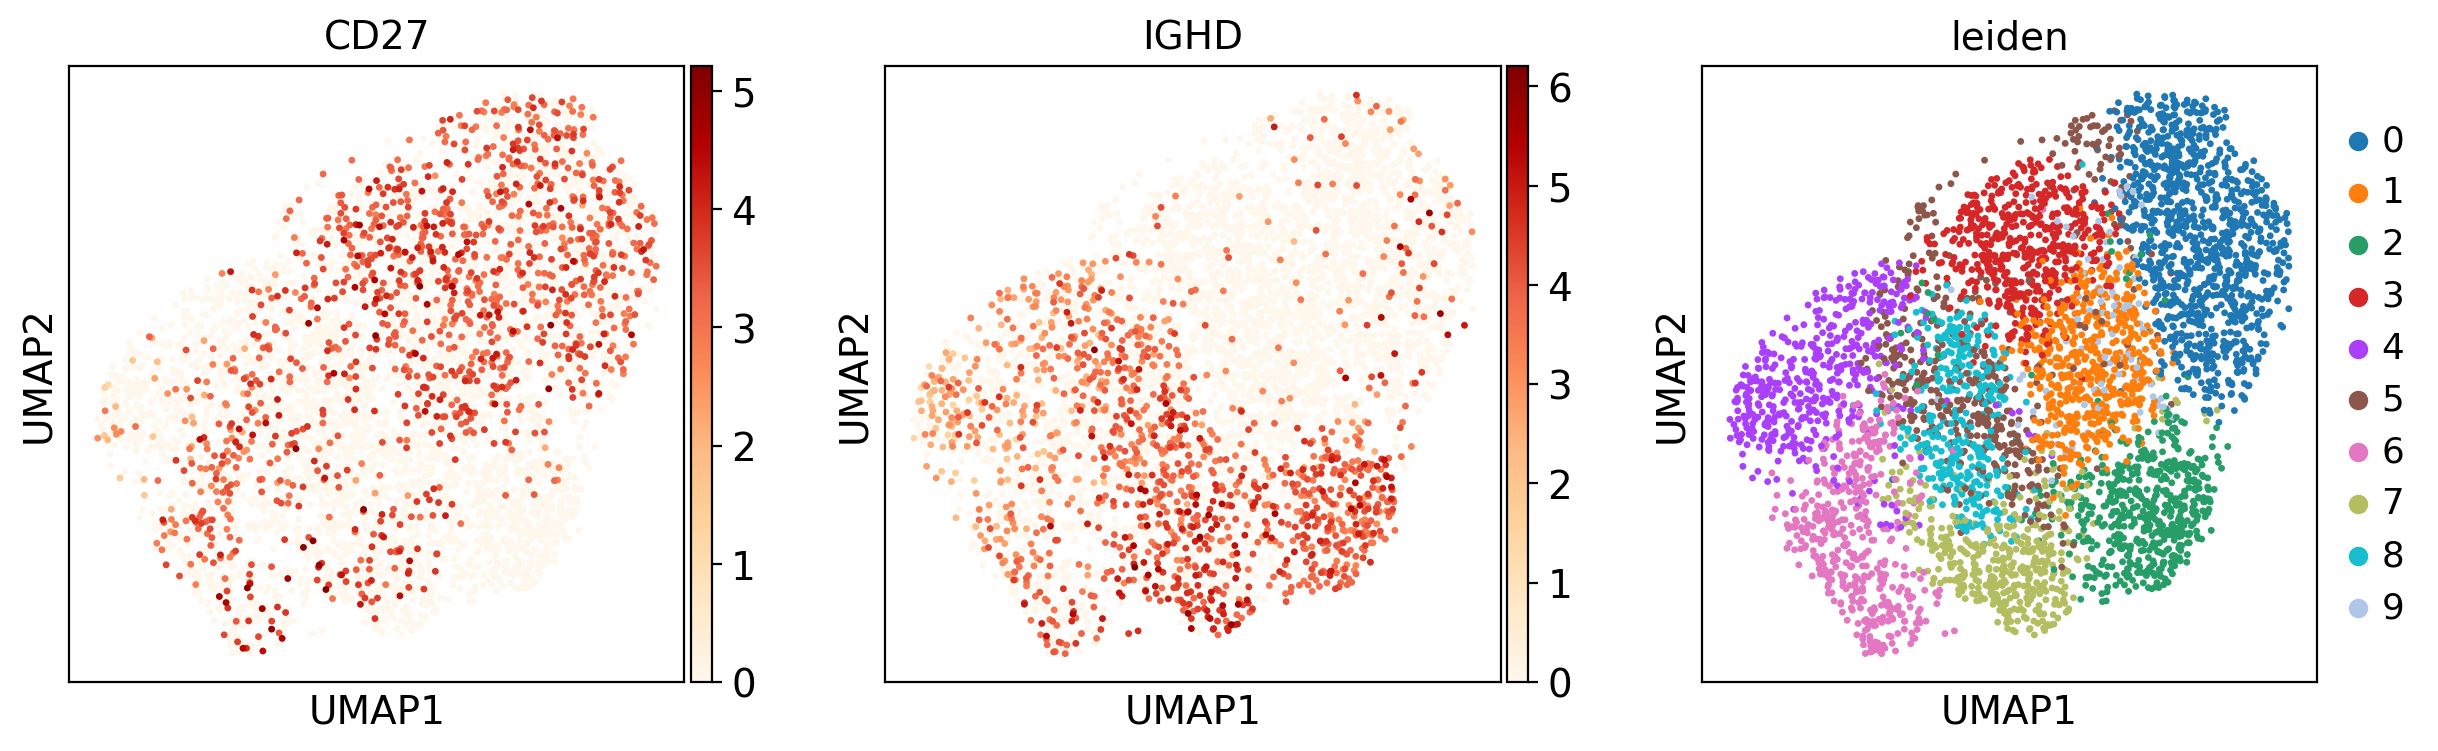

In [73]:
scjp.us(Bdata,'CD27,IGHD,leiden')

In [74]:
ann.update_condi(Bdata,Bdata.obs['anno_predict_B']!='jp24','B_naive')
ann.update(Bdata,'leiden','0,3,1,9','B_memory')

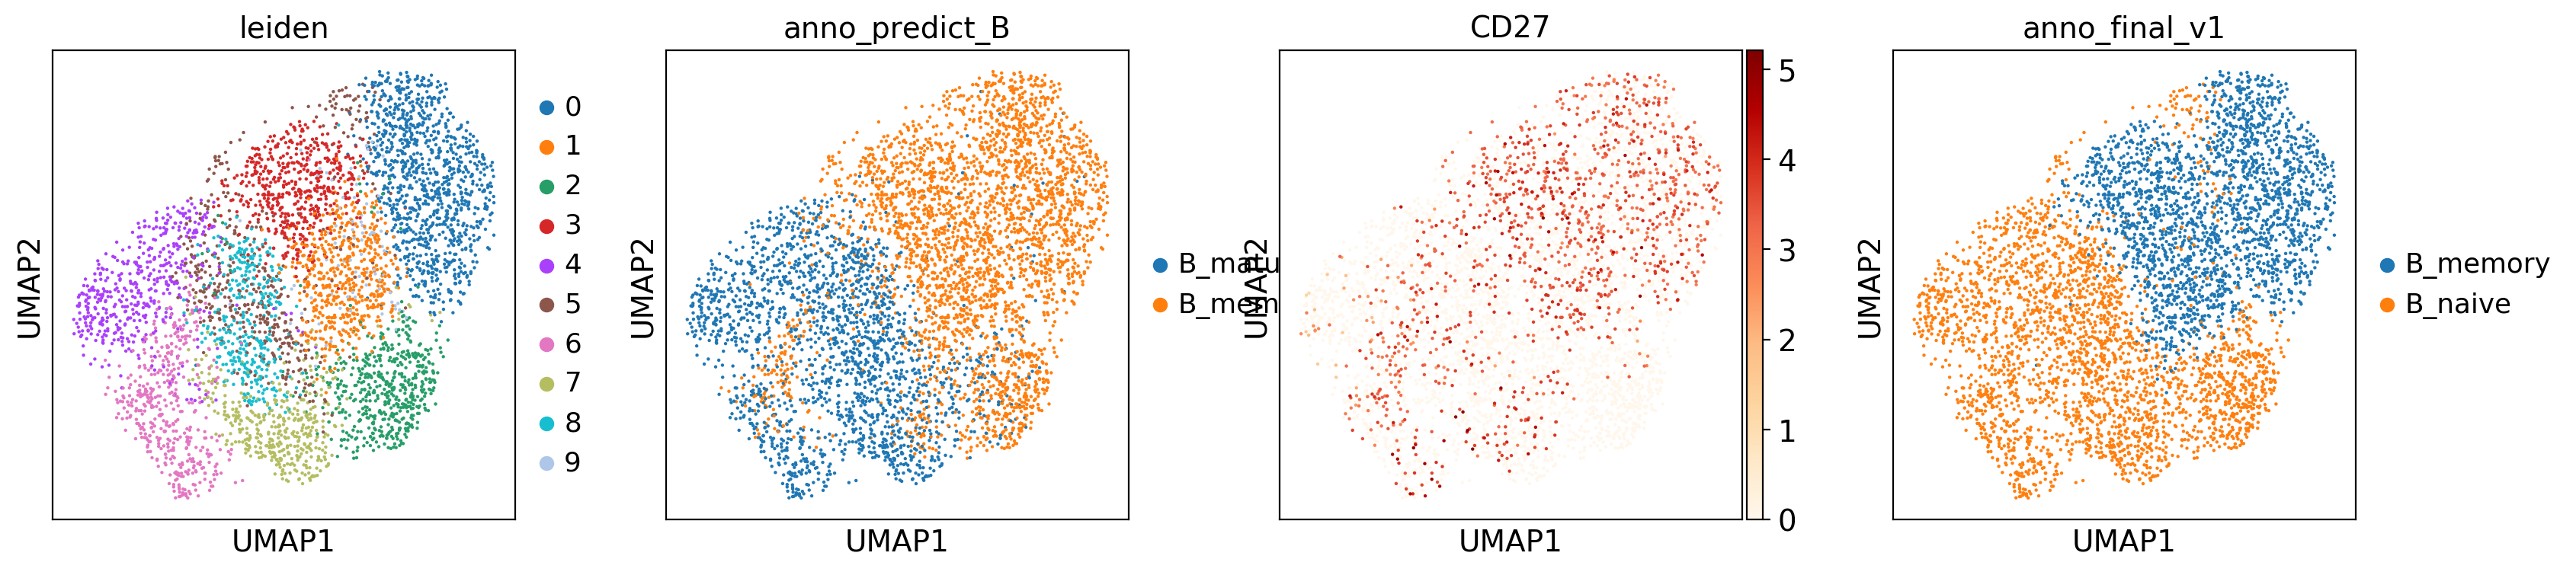

In [77]:
scjp.us(Bdata,'leiden,anno_predict_B,CD27,anno_final_v1'.split(','),size=10)

In [78]:
model.update_label(Bdata,'anno_final_v1',merged,'anno_predict_fig1','anno_final_v1',replace=True)

## Check annotation

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
y_test = merged.obs['anno_predict_fig1'][merged.obs_names.isin(fig1.obs_names)]
y_pred = merged.obs['anno_predict_B'][merged.obs_names.isin(fig1.obs_names)]
labels = sorted(set(y_pred).union(set(y_test)))
cm = confusion_matrix(y_test, y_pred,labels=labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

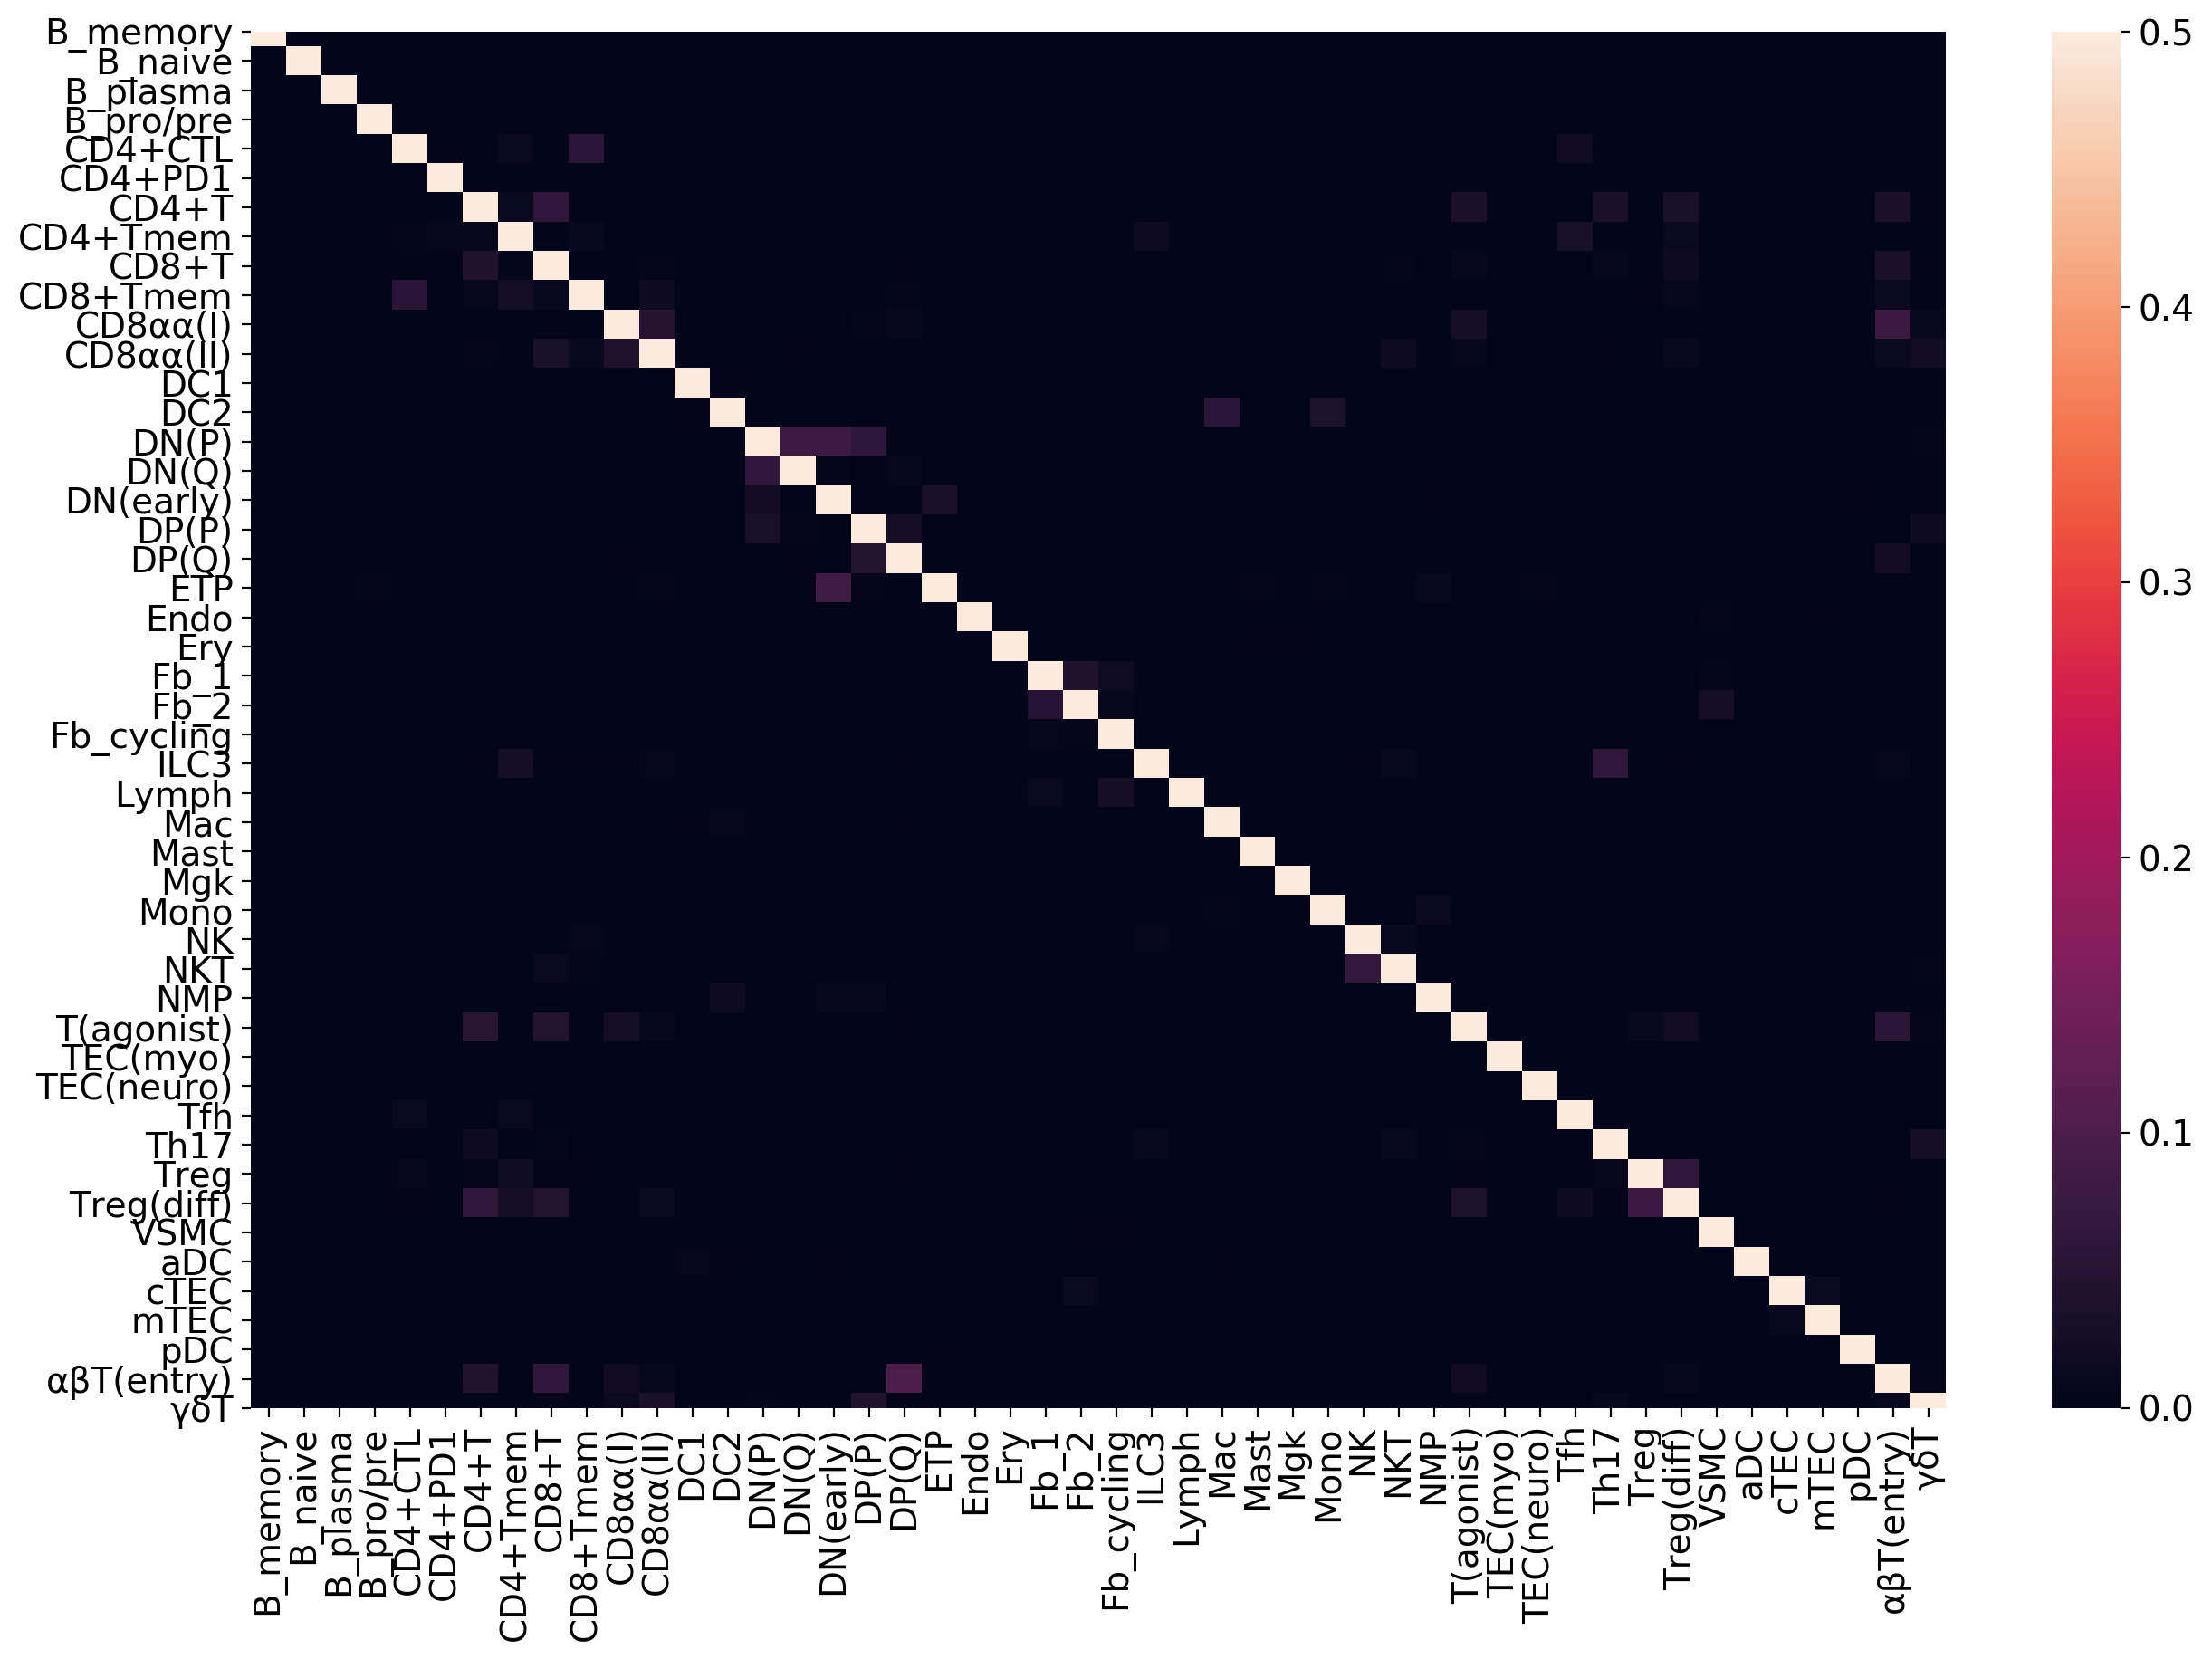

In [84]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=False,vmax=0.5,xticklabels=True,yticklabels=True)

## Update epithelial_data (later)

In [85]:
edata = sc.read("HTA07.A02.v01.edata_bbk")
TECs = merged[merged.obs['anno_final_v1'].str.contains('TEC')].copy()

Only considering the two last: ['.v01', '.edata_bbk'].


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [86]:
TECs.obs['anno_final_v2_epi'] = 'unknown'

creating lr model...


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



making lr prediction...
updating lr to adata...


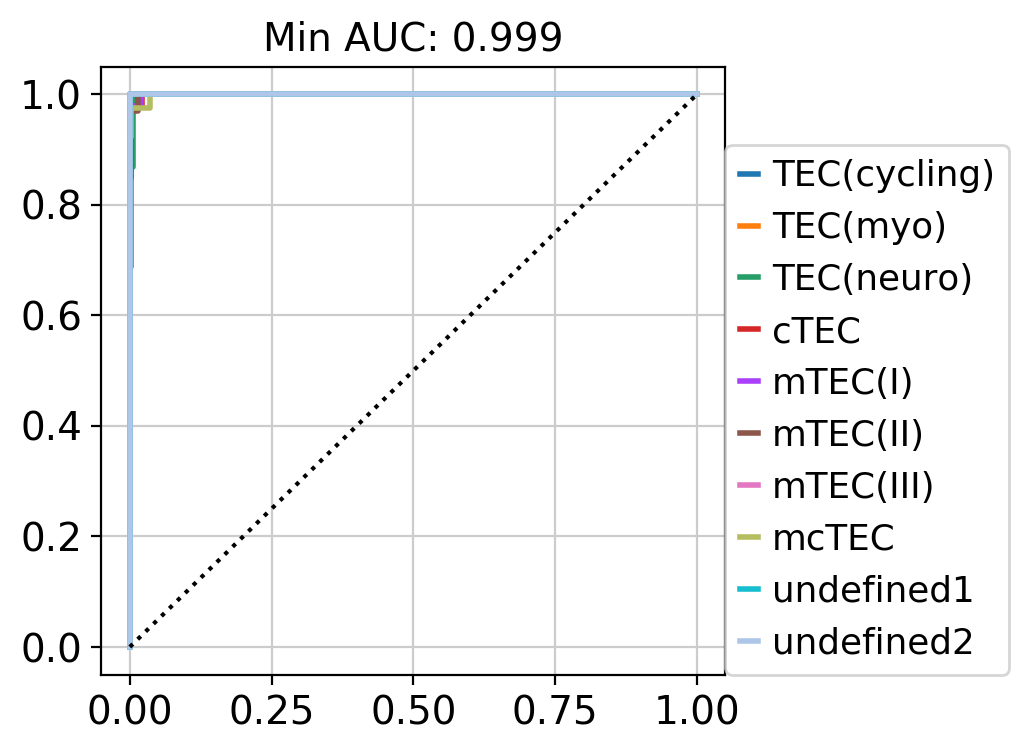

In [87]:
model.update_label(edata,'anno_pred_epi',TECs,'anno_final_v2_epi','anno_final_v2_epi',replace=True)
model.transfer_annotation_jp(TECs,'anno_final_v2_epi',TECs,'anno_final_v2_epi',exclude=['unknown'])
model.update_label(edata,'anno_pred_epi',TECs,'anno_final_v2_epi','anno_final_v2_epi',replace=True)
model.update_label(TECs,'anno_final_v2_epi',merged,'anno_final_v1','anno_final_v2_epi')

## Annotation_structure

In [88]:
anno_meta = pd.read_csv('/mnt/thymus_atlas/Annotation_meta.tsv',sep='\t')

In [89]:
anno_meta.columns

Index(['Anno_level_1', 'Anno_level_2', 'Anno_level_3', 'Anno_level_4',
       'Anno_level_5', 'Anno_level_fig1', 'Anno_level_Staal'],
      dtype='object')

In [90]:
meta_to_update = anno_meta.columns

In [91]:
check_list = merged.obs.columns.copy()
for cat in check_list:
    if cat in meta_to_update:
        print('deleting...:',cat)
        del merged.obs[cat]
    else:
        pass

In [92]:
merged_obs = pd.merge(ndata.obs,anno_meta[meta_to_update],left_on='anno_final_v1',right_on='Anno_level_5',how='left')

In [93]:
merged_obs.index = merged.obs_names

In [94]:
merged.obs = merged_obs

## [Checkpoint]

In [95]:
scjp.write(merged,version,'entire_data_meta_added')

... storing 'donor' as categorical


Only considering the two last: ['.A01', '.entire_data_meta_added'].


... storing 'source' as categorical
... storing 'birth' as categorical
... storing 'batch' as categorical
... storing 'bbk' as categorical
... storing 'Donor' as categorical
... storing 'Age' as categorical
... storing 'Gender' as categorical
... storing 'Source' as categorical
... storing 'Stage' as categorical
... storing 'Stage2' as categorical
... storing 'anno_pred' as categorical
... storing 'anno_fig1_detailed.replaced.1' as categorical
... storing 'anno_fig1_detailed' as categorical
... storing 'anno_predict_B' as categorical
... storing 'anno_predict_fig1.replaced.1' as categorical
... storing 'anno_predict_fig1' as categorical
... storing 'anno_final_v1' as categorical
... storing 'anno_final_v2_epi' as categorical
... storing 'Anno_level_1' as categorical
... storing 'Anno_level_2' as categorical
... storing 'Anno_level_3' as categorical
... storing 'Anno_level_4' as categorical
... storing 'Anno_level_5' as categorical
... storing 'Anno_level_fig1' as categorical
... storin

HTA08_v01_A01_entire_data_meta_added = 'HTA08.v01.A01.entire_data_meta_added'


In [110]:
merged = sc.read('HTA08.v01.A01.entire_data_meta_added')

Only considering the two last: ['.A01', '.entire_data_meta_added'].


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Run bbknn

## Run batch regression again

## Exclude doublets & weird subset

In [111]:
adata = merged

In [113]:
c_excl = ~adata.obs['sort'].isin('CD137,MAIT'.split(","))
c_dbl = ~adata.obs['broad_doublets']
c_F74 = ~adata.obs_names.isin(pkl.load(open('HTA07.A03.v01.F74_remove_obs_names.list.pkl','rb')))
c_donor = ~adata.obs['donor'].isin('T08,A45'.split(','))

In [114]:
adata.obs['donor_method'] = [x+y for x,y in zip(adata.obs['donor'],adata.obs['method'])]

In [115]:
adata.obs['Cycle_score'] = adata.obs['Cycle_score']/np.max(adata.obs['Cycle_score'])

In [117]:
adata = scjp.get_subset(adata,c_excl & c_dbl & c_F74 & c_donor)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:17.14)


In [118]:
bdata, X_explained = scjp.regress_iter(adata,['method','source','donor','Cycle_score'],['anno_predict_B'],'donor_method',scale=False)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:12.13)
computing batch balanced neighbors
	finished (0:04:24.35) --> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix


In [119]:
bdata.raw = sc.AnnData(adata.raw.X, var = adata.raw.var)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [120]:
sc.tl.umap(bdata)

computing UMAP
    using 'X_pca' with n_pcs = 50
    finished (0:12:02.99) --> added
    'X_umap', UMAP coordinates (adata.obsm)


... storing 'donor_method' as categorical


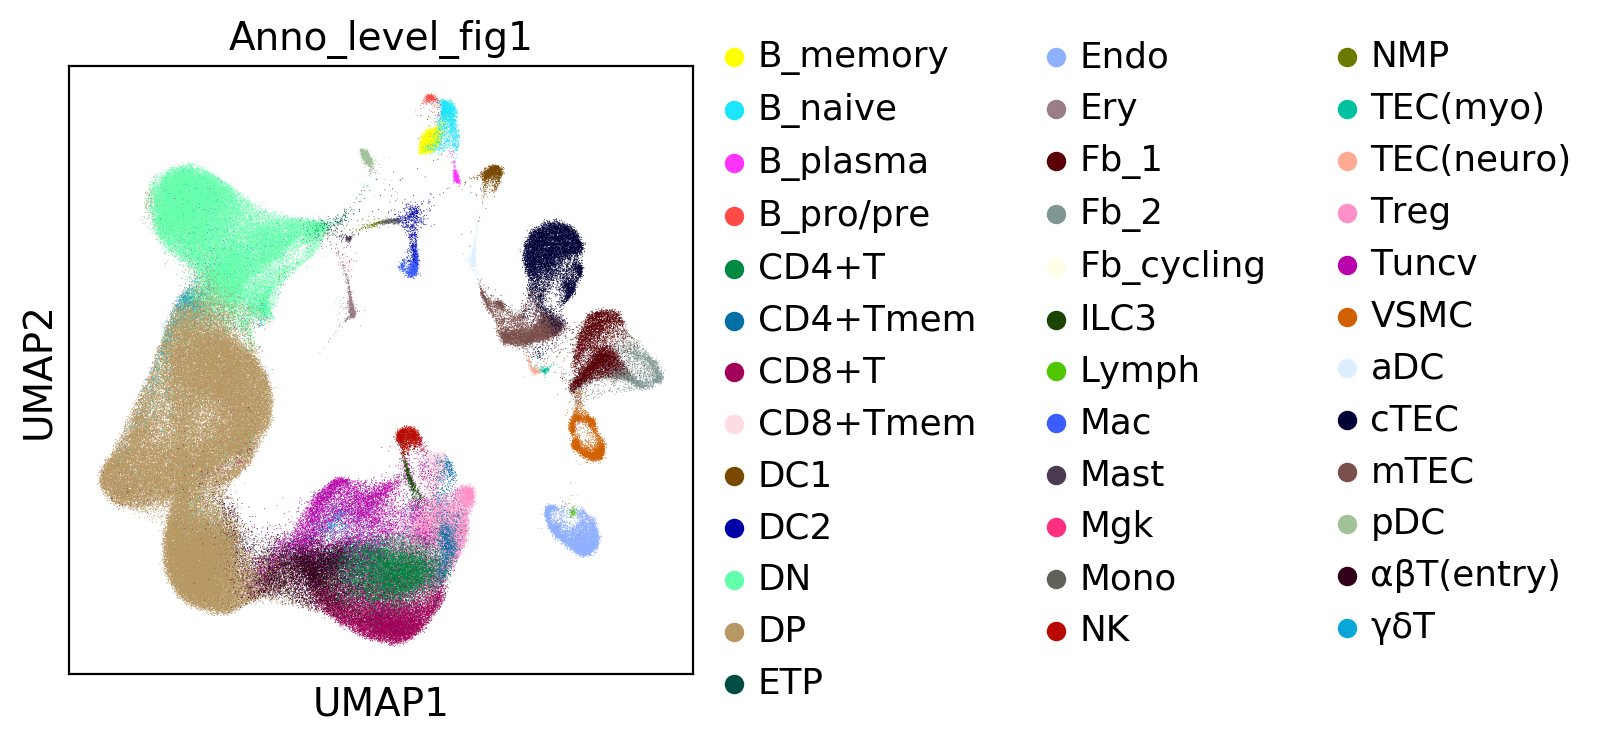

In [121]:
scjp.us(bdata,'Anno_level_fig1')

In [122]:
scjp.write(bdata,version,'fig1_data')

Only considering the two last: ['.A01', '.fig1_data'].
HTA08_v01_A01_fig1_data = 'HTA08.v01.A01.fig1_data'
